In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd 
import keras

from tensorflow import keras
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, Input, BatchNormalization
from tensorflow.keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [36]:
#There 42 000 samples with labels

In [37]:
#SVM Trial 1
#data = pd.read_csv('train.csv')
data = pd.read_csv('train 4.csv')

In [39]:
from sklearn.model_selection import train_test_split
X = data.drop('label', axis=1)
y = data['label']
#X = data[:,1:]
#y = data[:,0]

X = X/255.0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_vald, y_train, y_vald = train_test_split(X_train, y_train, test_size=0.25, random_state=0)

#X = X.values
#y = y.values

#np.random.seed(0) # make sure the shuffle happens same way every time we run the code
#np.random.shuffle(X)
#np.random.shuffle(y)


In [40]:
y_train = y_train.values
y_train

array([2, 3, 7, ..., 3, 1, 6])

In [41]:
#from sklearn.model_selection import train_test_split
# Split the dataset into training and testing
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
# Then we can split the training dataset into training and validation
#X_train, X_vald, y_train, y_vald = train_test_split(X_train, y_train, test_size = 0.25)

print(X_train.shape)
print(X_vald.shape)
print(X_test.shape)

(25200, 784)
(8400, 784)
(8400, 784)


In [42]:
X_train = X_train.values.reshape(-1, 28, 28, 1)
X_test = X_test.values.reshape(-1,28,28,1)
X_vald = X_vald.values.reshape(-1,28,28,1)

In [43]:
from keras.utils.np_utils import to_categorical

ky_train = to_categorical(y_train, num_classes=10)
#y_test = to_categorical(y_test, num_classes=10)
ky_vald = to_categorical(y_vald, num_classes=10)


In [44]:
X_train.shape

(25200, 28, 28, 1)

First Try: Network used in Lecture 7

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 1600)              0         
                                                                 
 dense_4 (Dense)             (None, 128)              

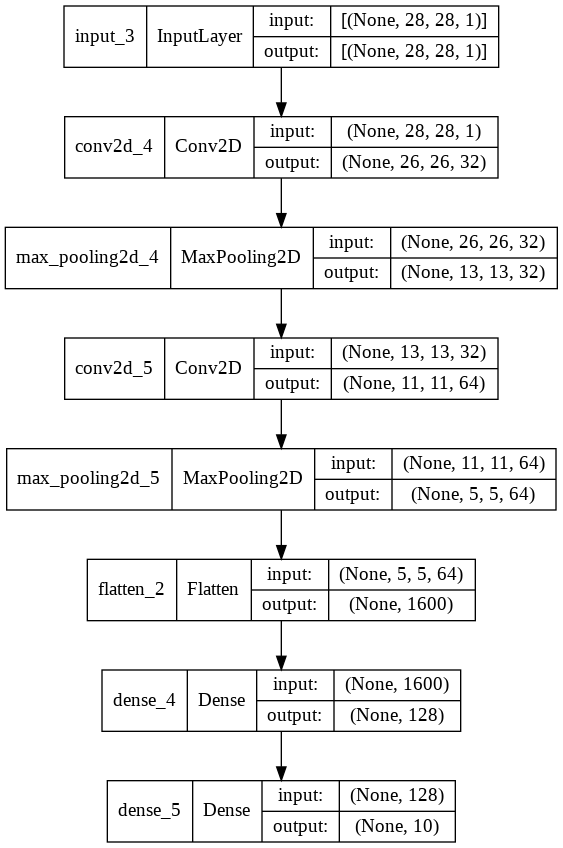

In [45]:
from tensorflow.keras import Input, layers, models

model = models.Sequential()
model.add(Input(shape=(X_train.shape[1],X_train.shape[2],X_train.shape[3]))) # Input layer (has cells equal to number of features)
# conv2D takes number of filters first, then the filter size, and activation function 
model.add(layers.Conv2D(32, (3, 3), activation='relu')) # parameters = 32*(3*3*3+1)
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu')) # parameters = 64*(3*3*32+1)
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu')) #hidden layers with 128 neurons
model.add(layers.Dense(10, activation='softmax'))
model.summary()
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes=True, show_layer_names=True)

In [46]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train, ky_train, epochs=20, batch_size=64,validation_data=(X_vald, ky_vald))

Epoch 1/20
394/394 [==============================] - 3s 5ms/step - loss: 0.2623 - accuracy: 0.9181 - val_loss: 0.1054 - val_accuracy: 0.9663
Epoch 2/20
394/394 [==============================] - 2s 5ms/step - loss: 0.0707 - accuracy: 0.9780 - val_loss: 0.0617 - val_accuracy: 0.9815
Epoch 3/20
394/394 [==============================] - 2s 5ms/step - loss: 0.0479 - accuracy: 0.9846 - val_loss: 0.0501 - val_accuracy: 0.9851
Epoch 4/20
394/394 [==============================] - 2s 5ms/step - loss: 0.0357 - accuracy: 0.9884 - val_loss: 0.0498 - val_accuracy: 0.9849
Epoch 5/20
394/394 [==============================] - 2s 5ms/step - loss: 0.0246 - accuracy: 0.9920 - val_loss: 0.0460 - val_accuracy: 0.9852
Epoch 6/20
394/394 [==============================] - 2s 5ms/step - loss: 0.0204 - accuracy: 0.9937 - val_loss: 0.0478 - val_accuracy: 0.9861
Epoch 7/20
394/394 [==============================] - 2s 5ms/step - loss: 0.0151 - accuracy: 0.9949 - val_loss: 0.0535 - val_accuracy: 0.9845
Epoch 

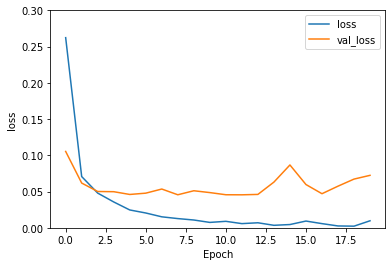

In [47]:
# Plot loss
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.ylim([0, 0.3])
plt.legend(loc='upper right')

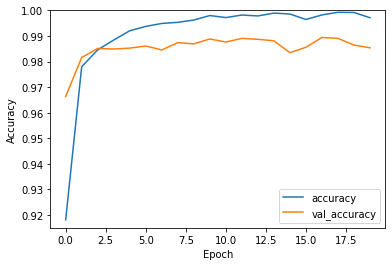

In [48]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.915, 1])
plt.legend(loc='lower right')

In [49]:
loss, accuracy = model.evaluate(X_train, ky_train, verbose=1)
loss_v, accuracy_v = model.evaluate(X_vald, ky_vald, verbose=1)
print("Validation: accuracy = %f  ;  loss_v = %f" % (accuracy_v, loss_v))
print("Train: accuracy = %f  ;  loss = %f" % (accuracy, loss))

263/263 [==============================] - 1s 3ms/step - loss: 0.0724 - accuracy: 0.9854
Validation: accuracy = 0.985357  ;  loss_v = 0.072387
Train: accuracy = 0.997381  ;  loss = 0.007507


Dense Layer

* Just dense layers





Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 512)               401920    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_7 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


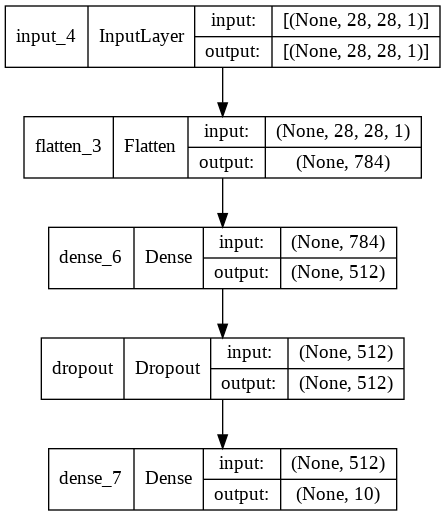

In [50]:
from tensorflow.keras import Input, layers, models

modelDense = models.Sequential()
modelDense.add(Input(shape=(X_train.shape[1],X_train.shape[2],X_train.shape[3]))) # Input layer (has cells equal to number of features)
modelDense.add(layers.Flatten())
modelDense.add(layers.Dense(512, activation='relu')) #hidden layers with 128 neurons
modelDense.add(Dropout(0.2))
modelDense.add(layers.Dense(10, activation='softmax'))
modelDense.summary()
from tensorflow.keras.utils import plot_model
plot_model(modelDense,show_shapes=True, show_layer_names=True)


In [51]:
modelDense.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
historyDense = modelDense.fit(X_train, ky_train, epochs=20, batch_size=64,validation_data=(X_vald, ky_vald))

Epoch 1/20
394/394 [==============================] - 2s 4ms/step - loss: 0.3489 - accuracy: 0.8979 - val_loss: 0.1811 - val_accuracy: 0.9492
Epoch 2/20
394/394 [==============================] - 1s 3ms/step - loss: 0.1553 - accuracy: 0.9542 - val_loss: 0.1378 - val_accuracy: 0.9583
Epoch 3/20
394/394 [==============================] - 1s 3ms/step - loss: 0.1054 - accuracy: 0.9694 - val_loss: 0.1124 - val_accuracy: 0.9662
Epoch 4/20
394/394 [==============================] - 1s 3ms/step - loss: 0.0796 - accuracy: 0.9766 - val_loss: 0.0993 - val_accuracy: 0.9706
Epoch 5/20
394/394 [==============================] - 1s 3ms/step - loss: 0.0599 - accuracy: 0.9822 - val_loss: 0.0933 - val_accuracy: 0.9720
Epoch 6/20
394/394 [==============================] - 1s 3ms/step - loss: 0.0457 - accuracy: 0.9865 - val_loss: 0.0884 - val_accuracy: 0.9730
Epoch 7/20
394/394 [==============================] - 1s 3ms/step - loss: 0.0351 - accuracy: 0.9895 - val_loss: 0.0980 - val_accuracy: 0.9727
Epoch 

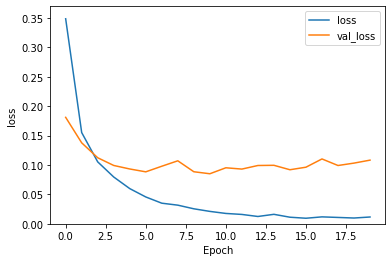

In [52]:
# Plot loss
plt.plot(historyDense.history['loss'], label='loss')
plt.plot(historyDense.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.ylim([0, 0.37])
plt.legend(loc='upper right')

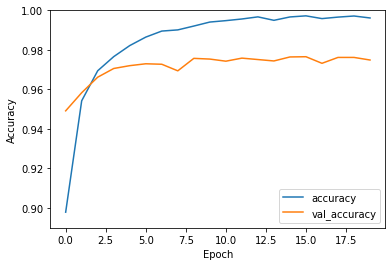

In [53]:
# Plot accuracy
plt.plot(historyDense.history['accuracy'], label='accuracy')
plt.plot(historyDense.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.89, 1])
plt.legend(loc='lower right')

In [54]:
lossD, accuracyD = modelDense.evaluate(X_train, ky_train, verbose=1)
loss_vD, accuracy_vD = modelDense.evaluate(X_vald, ky_vald, verbose=1)
print("Validation: accuracy = %f  ;  loss_v = %f" % (accuracy_vD, loss_vD))
print("Train: accuracy = %f  ;  loss = %f" % (accuracyD, lossD))

263/263 [==============================] - 1s 2ms/step - loss: 0.1083 - accuracy: 0.9749
Validation: accuracy = 0.974881  ;  loss_v = 0.108330
Train: accuracy = 0.999167  ;  loss = 0.003273


0.2 Dropout on Each Layer (not including input and output)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 5, 5, 64)         

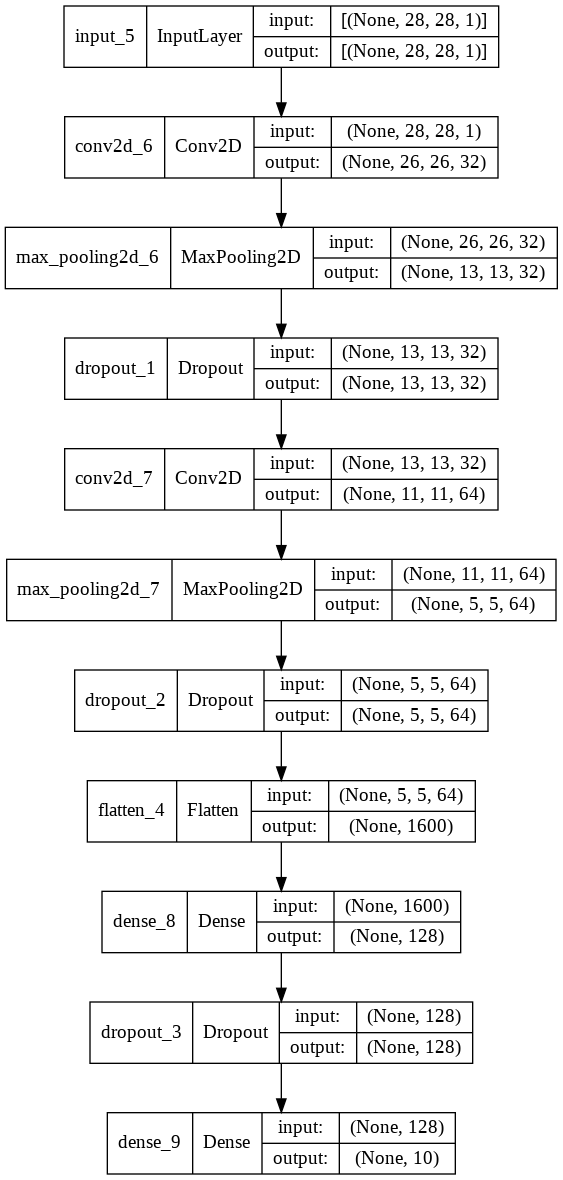

In [55]:
model1 = models.Sequential()
model1.add(Input(shape=(X_train.shape[1],X_train.shape[2],X_train.shape[3]))) # Input layer (has cells equal to number of features)
# conv2D takes number of filters first, then the filter size, and activation function 
model1.add(layers.Conv2D(32, (3, 3), activation='relu')) # parameters = 32*(3*3*3+1)
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(Dropout(0.2))

model1.add(layers.Conv2D(64, (3, 3), activation='relu')) # parameters = 64*(3*3*32+1)
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(Dropout(0.2))

model1.add(layers.Flatten())
model1.add(layers.Dense(128, activation='relu')) #hidden layers with 128 neurons
model1.add(Dropout(0.2))
model1.add(layers.Dense(10, activation='softmax'))
model1.summary()
plot_model(model1,show_shapes=True, show_layer_names=True)

In [56]:
model1.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history = model1.fit(X_train, ky_train, epochs=20, batch_size=64,validation_data=(X_vald, ky_vald))

Epoch 1/20
394/394 [==============================] - 3s 6ms/step - loss: 0.3525 - accuracy: 0.8912 - val_loss: 0.0973 - val_accuracy: 0.9686
Epoch 2/20
394/394 [==============================] - 2s 5ms/step - loss: 0.1066 - accuracy: 0.9652 - val_loss: 0.0784 - val_accuracy: 0.9756
Epoch 3/20
394/394 [==============================] - 2s 5ms/step - loss: 0.0760 - accuracy: 0.9756 - val_loss: 0.0527 - val_accuracy: 0.9846
Epoch 4/20
394/394 [==============================] - 2s 5ms/step - loss: 0.0611 - accuracy: 0.9805 - val_loss: 0.0423 - val_accuracy: 0.9863
Epoch 5/20
394/394 [==============================] - 2s 5ms/step - loss: 0.0476 - accuracy: 0.9847 - val_loss: 0.0461 - val_accuracy: 0.9862
Epoch 6/20
394/394 [==============================] - 2s 5ms/step - loss: 0.0432 - accuracy: 0.9869 - val_loss: 0.0422 - val_accuracy: 0.9881
Epoch 7/20
394/394 [==============================] - 2s 5ms/step - loss: 0.0372 - accuracy: 0.9879 - val_loss: 0.0434 - val_accuracy: 0.9877
Epoch 

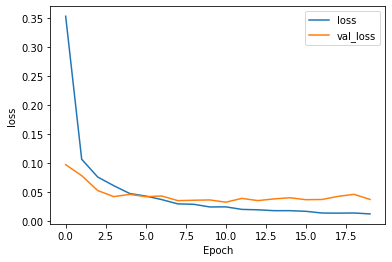

In [57]:
# Plot loss
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.legend(loc='upper right')

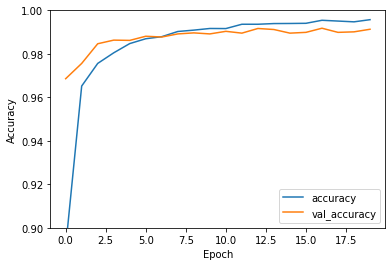

In [58]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.9, 1])
plt.legend(loc='lower right')

In [59]:
loss, accuracy = model1.evaluate(X_train, ky_train, verbose=1)
loss_v, accuracy_v = model1.evaluate(X_vald, ky_vald, verbose=1)
print("Validation: accuracy = %f  ;  loss_v = %f" % (accuracy_v, loss_v))
print("Train: accuracy = %f  ;  loss = %f" % (accuracy, loss))

263/263 [==============================] - 1s 3ms/step - loss: 0.0375 - accuracy: 0.9913
Validation: accuracy = 0.991310  ;  loss_v = 0.037455
Train: accuracy = 0.999564  ;  loss = 0.001805


L2 Regulizer


*   L2 = 0.01 on each convolutional layer and the first dense layer



Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 1600)              0         
                                                                 
 dense_12 (Dense)            (None, 128)              

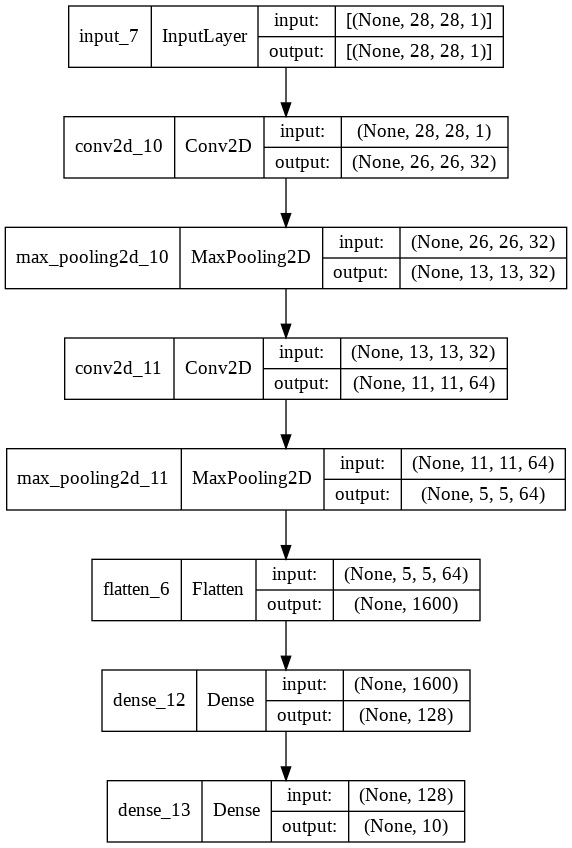

In [66]:
from keras.regularizers import l2,l1
from keras import regularizers

modelL1 = models.Sequential()
modelL1.add(Input(shape=(X_train.shape[1],X_train.shape[2],X_train.shape[3]))) # Input layer (has cells equal to number of features)
# conv2D takes number of filters first, then the filter size, and activation function 
modelL1.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=keras.regularizers.l2(0.01))) # parameters = 32*(3*3*3+1)
modelL1.add(layers.MaxPooling2D((2, 2)))
#modelL1.add(Dropout(0.2))

modelL1.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=keras.regularizers.l2(0.01))) # parameters = 64*(3*3*32+1)
modelL1.add(layers.MaxPooling2D((2, 2)))
#modelL1.add(Dropout(0.2))

modelL1.add(layers.Flatten())
modelL1.add(layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01))) #hidden layers with 128 neurons
#modelL1.add(Dropout(0.2))
modelL1.add(layers.Dense(10, activation='softmax'))
modelL1.summary()
plot_model(modelL1,show_shapes=True, show_layer_names=True)

In [61]:
modelL1.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
historyL1 = modelL1.fit(X_train, ky_train, epochs=20, batch_size=64,validation_data=(X_vald, ky_vald))

Epoch 1/20
394/394 [==============================] - 3s 5ms/step - loss: 0.9117 - accuracy: 0.8982 - val_loss: 0.4209 - val_accuracy: 0.9473
Epoch 2/20
394/394 [==============================] - 2s 5ms/step - loss: 0.3863 - accuracy: 0.9505 - val_loss: 0.3787 - val_accuracy: 0.9465
Epoch 3/20
394/394 [==============================] - 2s 5ms/step - loss: 0.3449 - accuracy: 0.9552 - val_loss: 0.3332 - val_accuracy: 0.9540
Epoch 4/20
394/394 [==============================] - 2s 5ms/step - loss: 0.3296 - accuracy: 0.9563 - val_loss: 0.3069 - val_accuracy: 0.9650
Epoch 5/20
394/394 [==============================] - 2s 5ms/step - loss: 0.3112 - accuracy: 0.9585 - val_loss: 0.3119 - val_accuracy: 0.9557
Epoch 6/20
394/394 [==============================] - 2s 5ms/step - loss: 0.2962 - accuracy: 0.9631 - val_loss: 0.2841 - val_accuracy: 0.9656
Epoch 7/20
394/394 [==============================] - 2s 5ms/step - loss: 0.2839 - accuracy: 0.9642 - val_loss: 0.2765 - val_accuracy: 0.9642
Epoch 

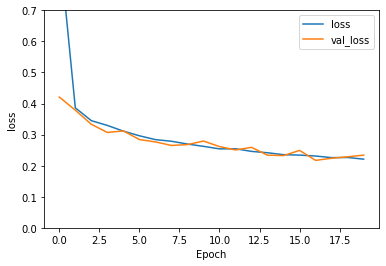

In [62]:
# Plot loss
plt.plot(historyL1.history['loss'], label='loss')
plt.plot(historyL1.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.ylim([0, 0.7])
plt.legend(loc='upper right')

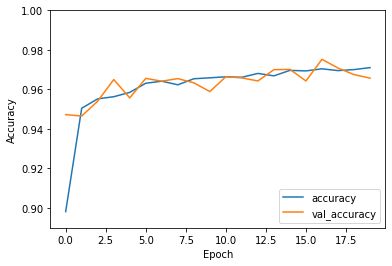

In [64]:
# Plot accuracy
plt.plot(historyL1.history['accuracy'], label='accuracy')
plt.plot(historyL1.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.89, 1])
plt.legend(loc='lower right')

In [65]:
loss1, accuracy1 = modelL1.evaluate(X_train, ky_train, verbose=1)
loss_v1, accuracy_v1 = modelL1.evaluate(X_vald, ky_vald, verbose=1)
print("Validation: accuracy = %f  ;  loss_v = %f" % (accuracy_v1, loss_v1))
print("Train: accuracy = %f  ;  loss = %f" % (accuracy1, loss1))

263/263 [==============================] - 1s 3ms/step - loss: 0.2340 - accuracy: 0.9657
Validation: accuracy = 0.965714  ;  loss_v = 0.233953
Train: accuracy = 0.968611  ;  loss = 0.224877


L2 & Droput

*   Only on first dense layer




Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 1600)              0         
                                                                 
 dense_16 (Dense)            (None, 128)              

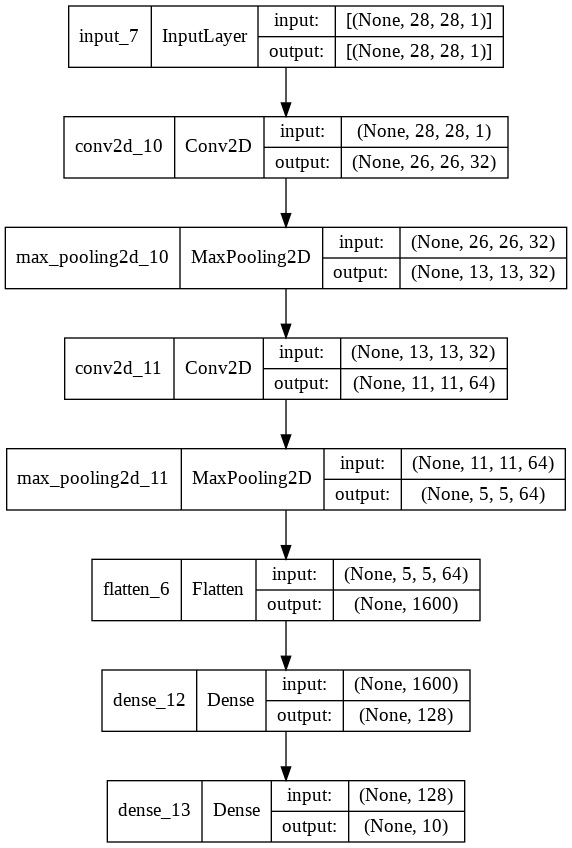

In [68]:
model3 = models.Sequential()
model3.add(Input(shape=(X_train.shape[1],X_train.shape[2],X_train.shape[3]))) # Input layer (has cells equal to number of features)
# conv2D takes number of filters first, then the filter size, and activation function 
model3.add(layers.Conv2D(32, (3, 3), activation='relu')) # parameters = 32*(3*3*3+1)
model3.add(layers.MaxPooling2D((2, 2)))
#modelL1.add(Dropout(0.2))

model3.add(layers.Conv2D(64, (3, 3), activation='relu')) # parameters = 64*(3*3*32+1)
model3.add(layers.MaxPooling2D((2, 2)))
#modelL1.add(Dropout(0.2))

model3.add(layers.Flatten())
model3.add(layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01))) #hidden layers with 128 neurons
model3.add(Dropout(0.2))
model3.add(layers.Dense(10, activation='softmax'))
model3.summary()
plot_model(modelL1,show_shapes=True, show_layer_names=True)

In [69]:
model3.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history3 = model3.fit(X_train, ky_train, epochs=20, batch_size=64,validation_data=(X_vald, ky_vald))

Epoch 1/20
394/394 [==============================] - 3s 6ms/step - loss: 0.7132 - accuracy: 0.8988 - val_loss: 0.2650 - val_accuracy: 0.9595
Epoch 2/20
394/394 [==============================] - 2s 6ms/step - loss: 0.2476 - accuracy: 0.9581 - val_loss: 0.2102 - val_accuracy: 0.9708
Epoch 3/20
394/394 [==============================] - 2s 5ms/step - loss: 0.2115 - accuracy: 0.9642 - val_loss: 0.1821 - val_accuracy: 0.9733
Epoch 4/20
394/394 [==============================] - 2s 5ms/step - loss: 0.1936 - accuracy: 0.9690 - val_loss: 0.1682 - val_accuracy: 0.9771
Epoch 5/20
394/394 [==============================] - 2s 5ms/step - loss: 0.1859 - accuracy: 0.9717 - val_loss: 0.1565 - val_accuracy: 0.9804
Epoch 6/20
394/394 [==============================] - 2s 5ms/step - loss: 0.1800 - accuracy: 0.9715 - val_loss: 0.1636 - val_accuracy: 0.9771
Epoch 7/20
394/394 [==============================] - 2s 5ms/step - loss: 0.1640 - accuracy: 0.9750 - val_loss: 0.1441 - val_accuracy: 0.9814
Epoch 

In [70]:
loss1, accuracy1 = model3.evaluate(X_train, ky_train, verbose=1)
loss_v1, accuracy_v1 = model3.evaluate(X_vald, ky_vald, verbose=1)
print("Validation: accuracy = %f  ;  loss_v = %f" % (accuracy_v1, loss_v1))
print("Train: accuracy = %f  ;  loss = %f" % (accuracy1, loss1))

263/263 [==============================] - 1s 3ms/step - loss: 0.1461 - accuracy: 0.9788
Validation: accuracy = 0.978810  ;  loss_v = 0.146104
Train: accuracy = 0.983691  ;  loss = 0.121839


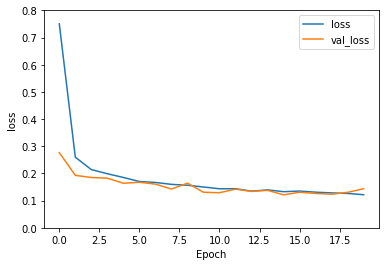

In [ ]:
# Plot loss
plt.plot(history3.history['loss'], label='loss')
plt.plot(history3.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.ylim([0, 0.8])
plt.legend(loc='upper right')

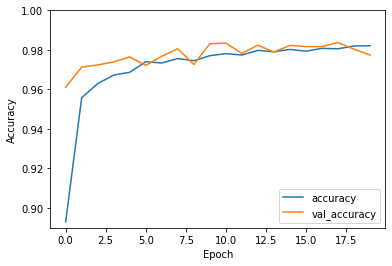

In [ ]:
# Plot accuracy
plt.plot(history3.history['accuracy'], label='accuracy')
plt.plot(history3.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.89, 1])
plt.legend(loc='lower right')

L2, Dropout on first Dense Layer


*   Conv2D Layers have 64 neurons each



In [71]:
model4 = models.Sequential()
model4.add(Input(shape=(X_train.shape[1],X_train.shape[2],X_train.shape[3]))) # Input layer (has cells equal to number of features)
# conv2D takes number of filters first, then the filter size, and activation function 
model4.add(layers.Conv2D(64, (3, 3), activation='relu')) # parameters = 32*(3*3*3+1)
model4.add(layers.MaxPooling2D((2, 2)))
#modelL1.add(Dropout(0.2))

model4.add(layers.Conv2D(64, (3, 3), activation='relu')) # parameters = 64*(3*3*32+1)
model4.add(layers.MaxPooling2D((2, 2)))
#modelL1.add(Dropout(0.2))

model4.add(layers.Flatten())
model4.add(layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01))) #hidden layers with 128 neurons
model4.add(Dropout(0.2))
model4.add(layers.Dense(10, activation='softmax'))
model4.summary()
plot_model(modelL1,show_shapes=True, show_layer_names=True)

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_9 (Flatten)         (None, 1600)              0         
                                                                 
 dense_18 (Dense)            (None, 128)              

In [72]:
model4.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history4 = model4.fit(X_train, ky_train, epochs=20, batch_size=64,validation_data=(X_vald, ky_vald))

Epoch 1/20
394/394 [==============================] - 3s 6ms/step - loss: 0.7067 - accuracy: 0.9042 - val_loss: 0.2431 - val_accuracy: 0.9677
Epoch 2/20
394/394 [==============================] - 2s 5ms/step - loss: 0.2322 - accuracy: 0.9630 - val_loss: 0.1843 - val_accuracy: 0.9743
Epoch 3/20
394/394 [==============================] - 2s 5ms/step - loss: 0.1984 - accuracy: 0.9684 - val_loss: 0.1714 - val_accuracy: 0.9769
Epoch 4/20
394/394 [==============================] - 2s 5ms/step - loss: 0.1828 - accuracy: 0.9715 - val_loss: 0.1570 - val_accuracy: 0.9774
Epoch 5/20
394/394 [==============================] - 2s 5ms/step - loss: 0.1746 - accuracy: 0.9725 - val_loss: 0.1523 - val_accuracy: 0.9811
Epoch 6/20
394/394 [==============================] - 2s 5ms/step - loss: 0.1608 - accuracy: 0.9752 - val_loss: 0.1473 - val_accuracy: 0.9789
Epoch 7/20
394/394 [==============================] - 2s 5ms/step - loss: 0.1600 - accuracy: 0.9756 - val_loss: 0.1444 - val_accuracy: 0.9815
Epoch 

In [73]:
loss4, accuracy4 = model4.evaluate(X_train, ky_train, verbose=1)
loss_v4, accuracy_v4 = model4.evaluate(X_vald, ky_vald, verbose=1)
print("Validation: accuracy = %f  ;  loss_v = %f" % (accuracy_v4, loss_v4))
print("Train: accuracy = %f  ;  loss = %f" % (accuracy4, loss4))

263/263 [==============================] - 1s 3ms/step - loss: 0.1233 - accuracy: 0.9830
Validation: accuracy = 0.982976  ;  loss_v = 0.123256
Train: accuracy = 0.989881  ;  loss = 0.101235


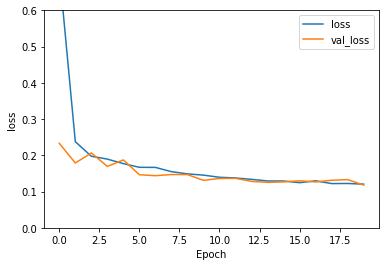

In [ ]:
# Plot loss
plt.plot(history4.history['loss'], label='loss')
plt.plot(history4.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.ylim([0, 0.6])
plt.legend(loc='upper right')

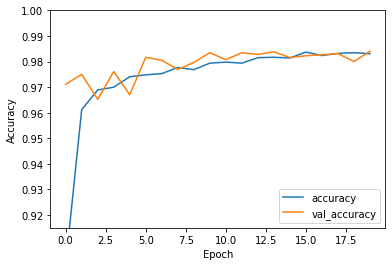

In [ ]:
# Plot accuracy
plt.plot(history4.history['accuracy'], label='accuracy')
plt.plot(history4.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.915, 1])
plt.legend(loc='lower right')

Same thing as before, but this time we added a new Conv2D layer with 64 neurons

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_21 (Conv2D)          (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_23 (MaxPoolin  (None, 1, 1, 64)       

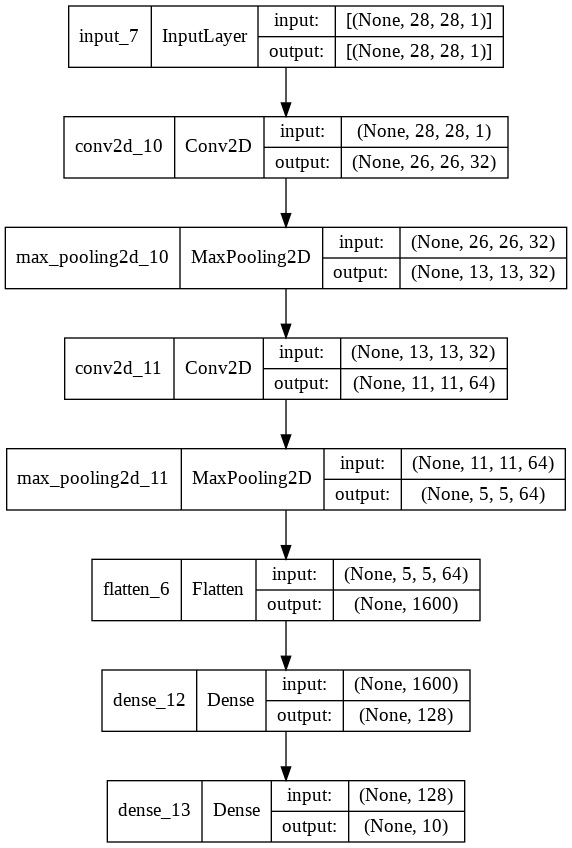

In [75]:
model5 = models.Sequential()
model5.add(Input(shape=(X_train.shape[1],X_train.shape[2],X_train.shape[3]))) # Input layer (has cells equal to number of features)
# conv2D takes number of filters first, then the filter size, and activation function 
model5.add(layers.Conv2D(32, (3, 3), activation='relu')) # parameters = 32*(3*3*3+1)
model5.add(layers.MaxPooling2D((2, 2)))

model5.add(layers.Conv2D(64, (3, 3), activation='relu')) # parameters = 32*(3*3*3+1)
model5.add(layers.MaxPooling2D((2, 2)))
#modelL1.add(Dropout(0.2))

model5.add(layers.Conv2D(64, (3, 3), activation='relu')) # parameters = 64*(3*3*32+1)
model5.add(layers.MaxPooling2D((2, 2)))
#modelL1.add(Dropout(0.2))

model5.add(layers.Flatten())
model5.add(layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01))) #hidden layers with 128 neurons
model5.add(Dropout(0.2))
model5.add(layers.Dense(10, activation='softmax'))
model5.summary()
plot_model(modelL1,show_shapes=True, show_layer_names=True)

In [76]:
model5.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history5 = model5.fit(X_train, ky_train, epochs=20, batch_size=64,validation_data=(X_vald, ky_vald))

Epoch 1/20
394/394 [==============================] - 3s 6ms/step - loss: 0.8133 - accuracy: 0.8399 - val_loss: 0.3571 - val_accuracy: 0.9436
Epoch 2/20
394/394 [==============================] - 2s 5ms/step - loss: 0.2902 - accuracy: 0.9499 - val_loss: 0.2255 - val_accuracy: 0.9570
Epoch 3/20
394/394 [==============================] - 2s 5ms/step - loss: 0.1977 - accuracy: 0.9624 - val_loss: 0.1808 - val_accuracy: 0.9598
Epoch 4/20
394/394 [==============================] - 2s 5ms/step - loss: 0.1520 - accuracy: 0.9688 - val_loss: 0.1320 - val_accuracy: 0.9723
Epoch 5/20
394/394 [==============================] - 2s 5ms/step - loss: 0.1257 - accuracy: 0.9726 - val_loss: 0.1262 - val_accuracy: 0.9707
Epoch 6/20
394/394 [==============================] - 2s 5ms/step - loss: 0.1145 - accuracy: 0.9747 - val_loss: 0.1060 - val_accuracy: 0.9761
Epoch 7/20
394/394 [==============================] - 2s 5ms/step - loss: 0.1031 - accuracy: 0.9769 - val_loss: 0.0998 - val_accuracy: 0.9777
Epoch 

In [77]:
loss5, accuracy5 = model5.evaluate(X_train, ky_train, verbose=1)
loss_v5, accuracy_v5 = model5.evaluate(X_vald, ky_vald, verbose=1)
print("Validation: accuracy = %f  ;  loss_v = %f" % (accuracy_v5, loss_v5))
print("Train: accuracy = %f  ;  loss = %f" % (accuracy5, loss5))

263/263 [==============================] - 1s 3ms/step - loss: 0.0904 - accuracy: 0.9810
Validation: accuracy = 0.980952  ;  loss_v = 0.090401
Train: accuracy = 0.995198  ;  loss = 0.034574


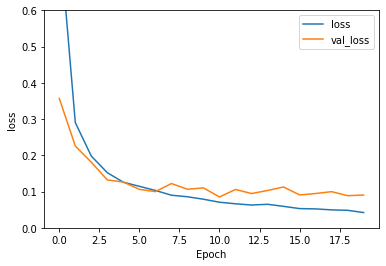

In [78]:
# Plot loss
plt.plot(history5.history['loss'], label='loss')
plt.plot(history5.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.ylim([0, 0.6])
plt.legend(loc='upper right')

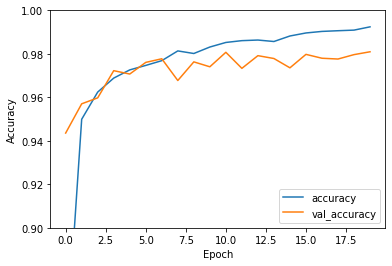

In [83]:
# Plot accuracy
plt.plot(history5.history['accuracy'], label='accuracy')
plt.plot(history5.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.9, 1])
plt.legend(loc='lower right')

Removed the new Conv2D layer and added BatchNorm to each Conv Layer, and 1st dense layer

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_29 (Conv2D)          (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_29 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 flatten_14 (Flatten)        (None, 1600)              0         
                                                                 
 dense_28 (Dense)            (None, 128)             

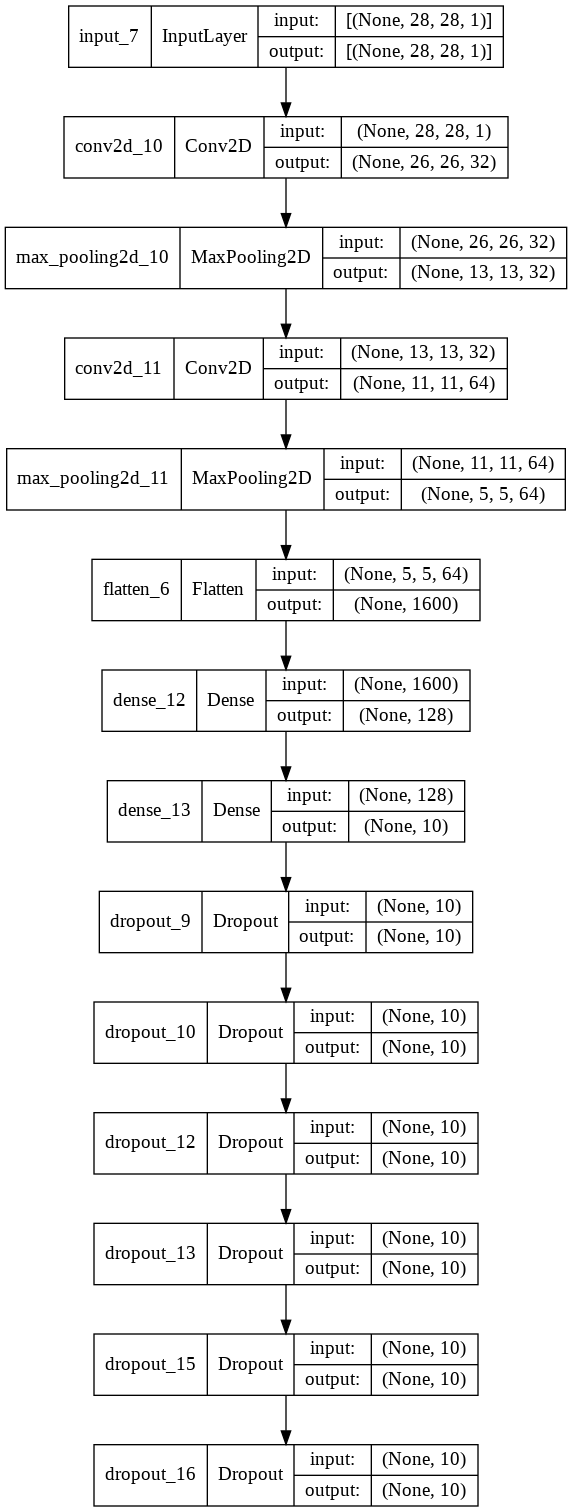

In [89]:
model6 = models.Sequential()
model6.add(Input(shape=(X_train.shape[1],X_train.shape[2],X_train.shape[3]))) # Input layer (has cells equal to number of features)
# conv2D takes number of filters first, then the filter size, and activation function 

model6.add(layers.Conv2D(64, (3, 3), activation='relu')) # parameters = 32*(3*3*3+1)
#model6.add(layers.BatchNormalization())
model6.add(layers.MaxPooling2D((2, 2)))
modelL1.add(Dropout(0.2))

model6.add(layers.Conv2D(64, (3, 3), activation='relu')) # parameters = 64*(3*3*32+1)
#model6.add(layers.BatchNormalization())
model6.add(layers.MaxPooling2D((2, 2)))
modelL1.add(Dropout(0.2))

model6.add(layers.Flatten())
model6.add(layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01))) #hidden layers with 128 neurons
model6.add(layers.BatchNormalization())
model6.add(Dropout(0.2))
model6.add(layers.Dense(10, activation='softmax'))
model6.summary()
plot_model(modelL1,show_shapes=True, show_layer_names=True)

In [90]:
model6.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history6 = model6.fit(X_train, ky_train, epochs=20, batch_size=64,validation_data=(X_vald, ky_vald))

Epoch 1/20
394/394 [==============================] - 4s 6ms/step - loss: 0.7064 - accuracy: 0.9483 - val_loss: 0.4217 - val_accuracy: 0.9388
Epoch 2/20
394/394 [==============================] - 2s 6ms/step - loss: 0.1658 - accuracy: 0.9754 - val_loss: 0.2358 - val_accuracy: 0.9502
Epoch 3/20
394/394 [==============================] - 2s 6ms/step - loss: 0.1415 - accuracy: 0.9785 - val_loss: 0.1672 - val_accuracy: 0.9712
Epoch 4/20
394/394 [==============================] - 2s 6ms/step - loss: 0.1281 - accuracy: 0.9810 - val_loss: 0.1591 - val_accuracy: 0.9707
Epoch 5/20
394/394 [==============================] - 2s 6ms/step - loss: 0.1194 - accuracy: 0.9825 - val_loss: 0.1245 - val_accuracy: 0.9800
Epoch 6/20
394/394 [==============================] - 2s 6ms/step - loss: 0.1140 - accuracy: 0.9825 - val_loss: 0.1275 - val_accuracy: 0.9804
Epoch 7/20
394/394 [==============================] - 2s 6ms/step - loss: 0.1078 - accuracy: 0.9845 - val_loss: 0.1399 - val_accuracy: 0.9767
Epoch 

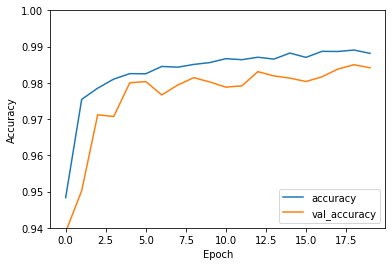

In [93]:
# Plot accuracy
plt.plot(history6.history['accuracy'], label='accuracy')
plt.plot(history6.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.94, 1])
plt.legend(loc='lower right')

In [94]:
loss6, accuracy6 = model6.evaluate(X_train, ky_train, verbose=1)
loss_v6, accuracy_v6 = model6.evaluate(X_vald, ky_vald, verbose=1)
print("Validation: accuracy = %f  ;  loss_v = %f" % (accuracy_v5, loss_v5))
print("Train: accuracy = %f  ;  loss = %f" % (accuracy5, loss5))

263/263 [==============================] - 1s 3ms/step - loss: 0.1137 - accuracy: 0.9842
Validation: accuracy = 0.980952  ;  loss_v = 0.090401
Train: accuracy = 0.995198  ;  loss = 0.034574


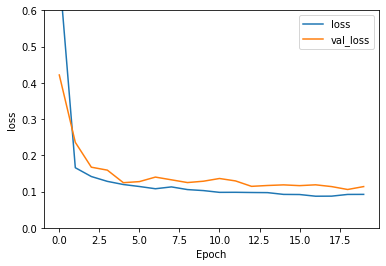

In [97]:
# Plot loss
plt.plot(history6.history['loss'], label='loss')
plt.plot(history6.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.ylim([0, 0.6])
plt.legend(loc='upper right')

Data Augmentation

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 dropout_18 (Dropout)        (None, 13, 13, 64)        0         
                                                                 
 conv2d_31 (Conv2D)          (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_31 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 dropout_19 (Dropout)        (None, 5, 5, 64)        

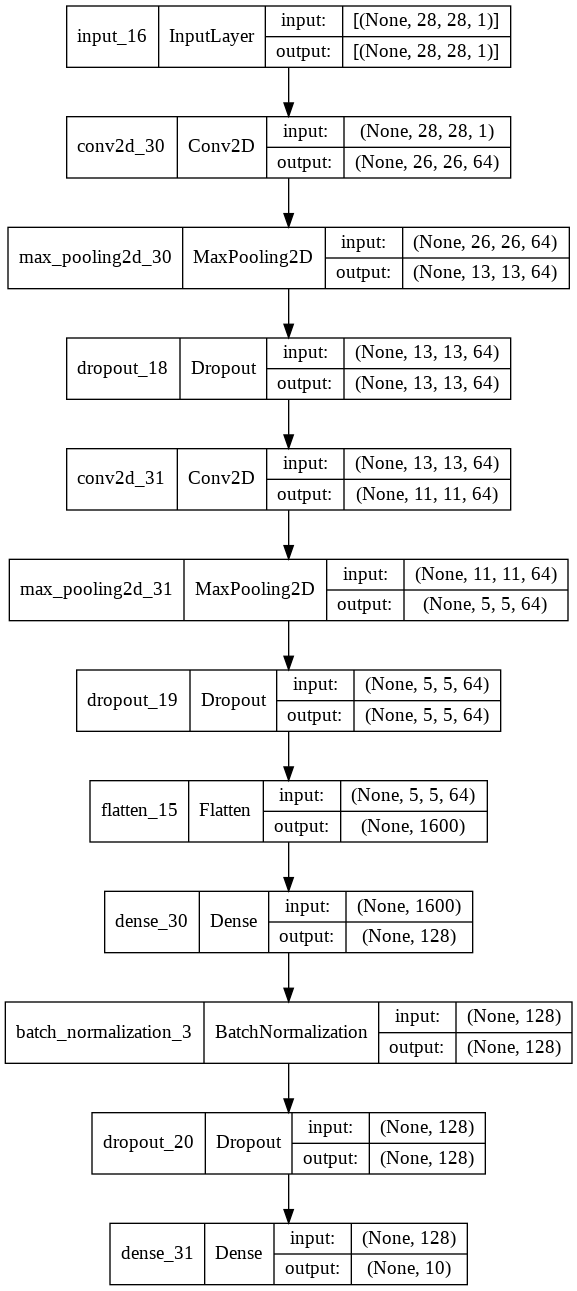

In [98]:
model7 = models.Sequential()
model7.add(Input(shape=(X_train.shape[1],X_train.shape[2],X_train.shape[3]))) # Input layer (has cells equal to number of features)
# conv2D takes number of filters first, then the filter size, and activation function 

model7.add(layers.Conv2D(64, (3, 3), activation='relu')) # parameters = 32*(3*3*3+1)
#model6.add(layers.BatchNormalization())
model7.add(layers.MaxPooling2D((2, 2)))
model7.add(Dropout(0.2))

model7.add(layers.Conv2D(64, (3, 3), activation='relu')) # parameters = 64*(3*3*32+1)
#model6.add(layers.BatchNormalization())
model7.add(layers.MaxPooling2D((2, 2)))
model7.add(Dropout(0.2))

model7.add(layers.Flatten())
model7.add(layers.Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.01))) #hidden layers with 128 neurons
model7.add(layers.BatchNormalization())
model7.add(Dropout(0.2))
model7.add(layers.Dense(10, activation='softmax'))
model7.summary()
plot_model(model7,show_shapes=True, show_layer_names=True)

In [108]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range=10, zoom_range=0.1)
datagen.fit(X_train)
datagen.fit(X_vald)

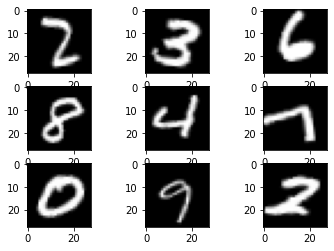

In [109]:
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
	# create a grid of 3x3 images
	for i in range(0, 9):
		plt.subplot(330 + 1 + i)
		plt.imshow(X_batch[i].reshape(28, 28), cmap=plt.get_cmap('gray'))
	# show the plot
	plt.show()
	break

In [110]:
model7.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
history7 = model7.fit(X_train, ky_train, epochs=20, batch_size=64,validation_data=(X_vald, ky_vald))

Epoch 1/20
394/394 [==============================] - 3s 6ms/step - loss: 0.1091 - accuracy: 0.9874 - val_loss: 0.1214 - val_accuracy: 0.9867
Epoch 2/20
394/394 [==============================] - 2s 6ms/step - loss: 0.1167 - accuracy: 0.9876 - val_loss: 0.1088 - val_accuracy: 0.9879
Epoch 3/20
394/394 [==============================] - 2s 6ms/step - loss: 0.1142 - accuracy: 0.9868 - val_loss: 0.1218 - val_accuracy: 0.9854
Epoch 4/20
394/394 [==============================] - 2s 6ms/step - loss: 0.1169 - accuracy: 0.9875 - val_loss: 0.1180 - val_accuracy: 0.9856
Epoch 5/20
394/394 [==============================] - 2s 6ms/step - loss: 0.1170 - accuracy: 0.9867 - val_loss: 0.1214 - val_accuracy: 0.9882
Epoch 6/20
394/394 [==============================] - 2s 6ms/step - loss: 0.1134 - accuracy: 0.9875 - val_loss: 0.1147 - val_accuracy: 0.9879
Epoch 7/20
394/394 [==============================] - 2s 6ms/step - loss: 0.1171 - accuracy: 0.9870 - val_loss: 0.1264 - val_accuracy: 0.9856
Epoch 

In [111]:
loss7, accuracy7 = model7.evaluate(X_train, ky_train, verbose=1)
loss_v7, accuracy_v7 = model7.evaluate(X_vald, ky_vald, verbose=1)
print("Validation: accuracy = %f  ;  loss_v = %f" % (accuracy_v7, loss_v7))
print("Train: accuracy = %f  ;  loss = %f" % (accuracy7, loss7))

263/263 [==============================] - 1s 3ms/step - loss: 0.1159 - accuracy: 0.9863
Validation: accuracy = 0.986310  ;  loss_v = 0.115855
Train: accuracy = 0.994405  ;  loss = 0.087414


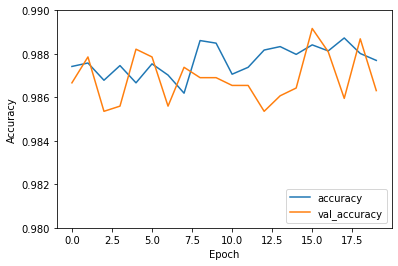

In [116]:
# Plot accuracy
plt.plot(history7.history['accuracy'], label='accuracy')
plt.plot(history7.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.98, 0.99])
plt.legend(loc='lower right')

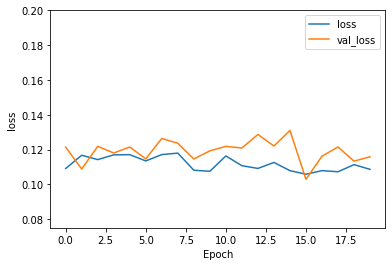

In [119]:
# Plot loss
plt.plot(history7.history['loss'], label='loss')
plt.plot(history7.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('loss')
plt.ylim([0.075, 0.2])
plt.legend(loc='upper right')

In [121]:
prediction = model1.predict(X_test)
prediction =np.argmax(prediction,axis=1)

In [123]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, prediction))  

0.9903571428571428


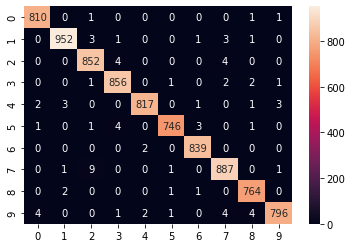

In [124]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

confusion_mtx = confusion_matrix(y_test, prediction)
sns.heatmap(confusion_mtx, annot=True, fmt='d')

In [ ]:
#https://medium.com/@mjbhobe/classifying-fashion-with-a-keras-cnn-achieving-94-accuracy-part-3-c7ca2919232b